In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df=pd.read_csv('breast_cancer_data2.csv')

In [ ]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [ ]:
df.shape

(569, 6)

# Information about data like Data type, columns name,size of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
# Check NULL Values
df.isnull().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


In [ ]:
# Checking Duplicates
df.duplicated().sum()

0

In [ ]:
#Import Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

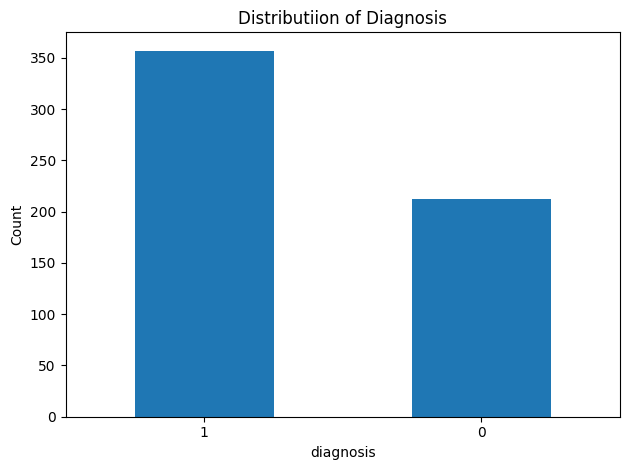

In [ ]:
# Check ratio of Diagnosis
df['diagnosis'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Distributiion of Diagnosis')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

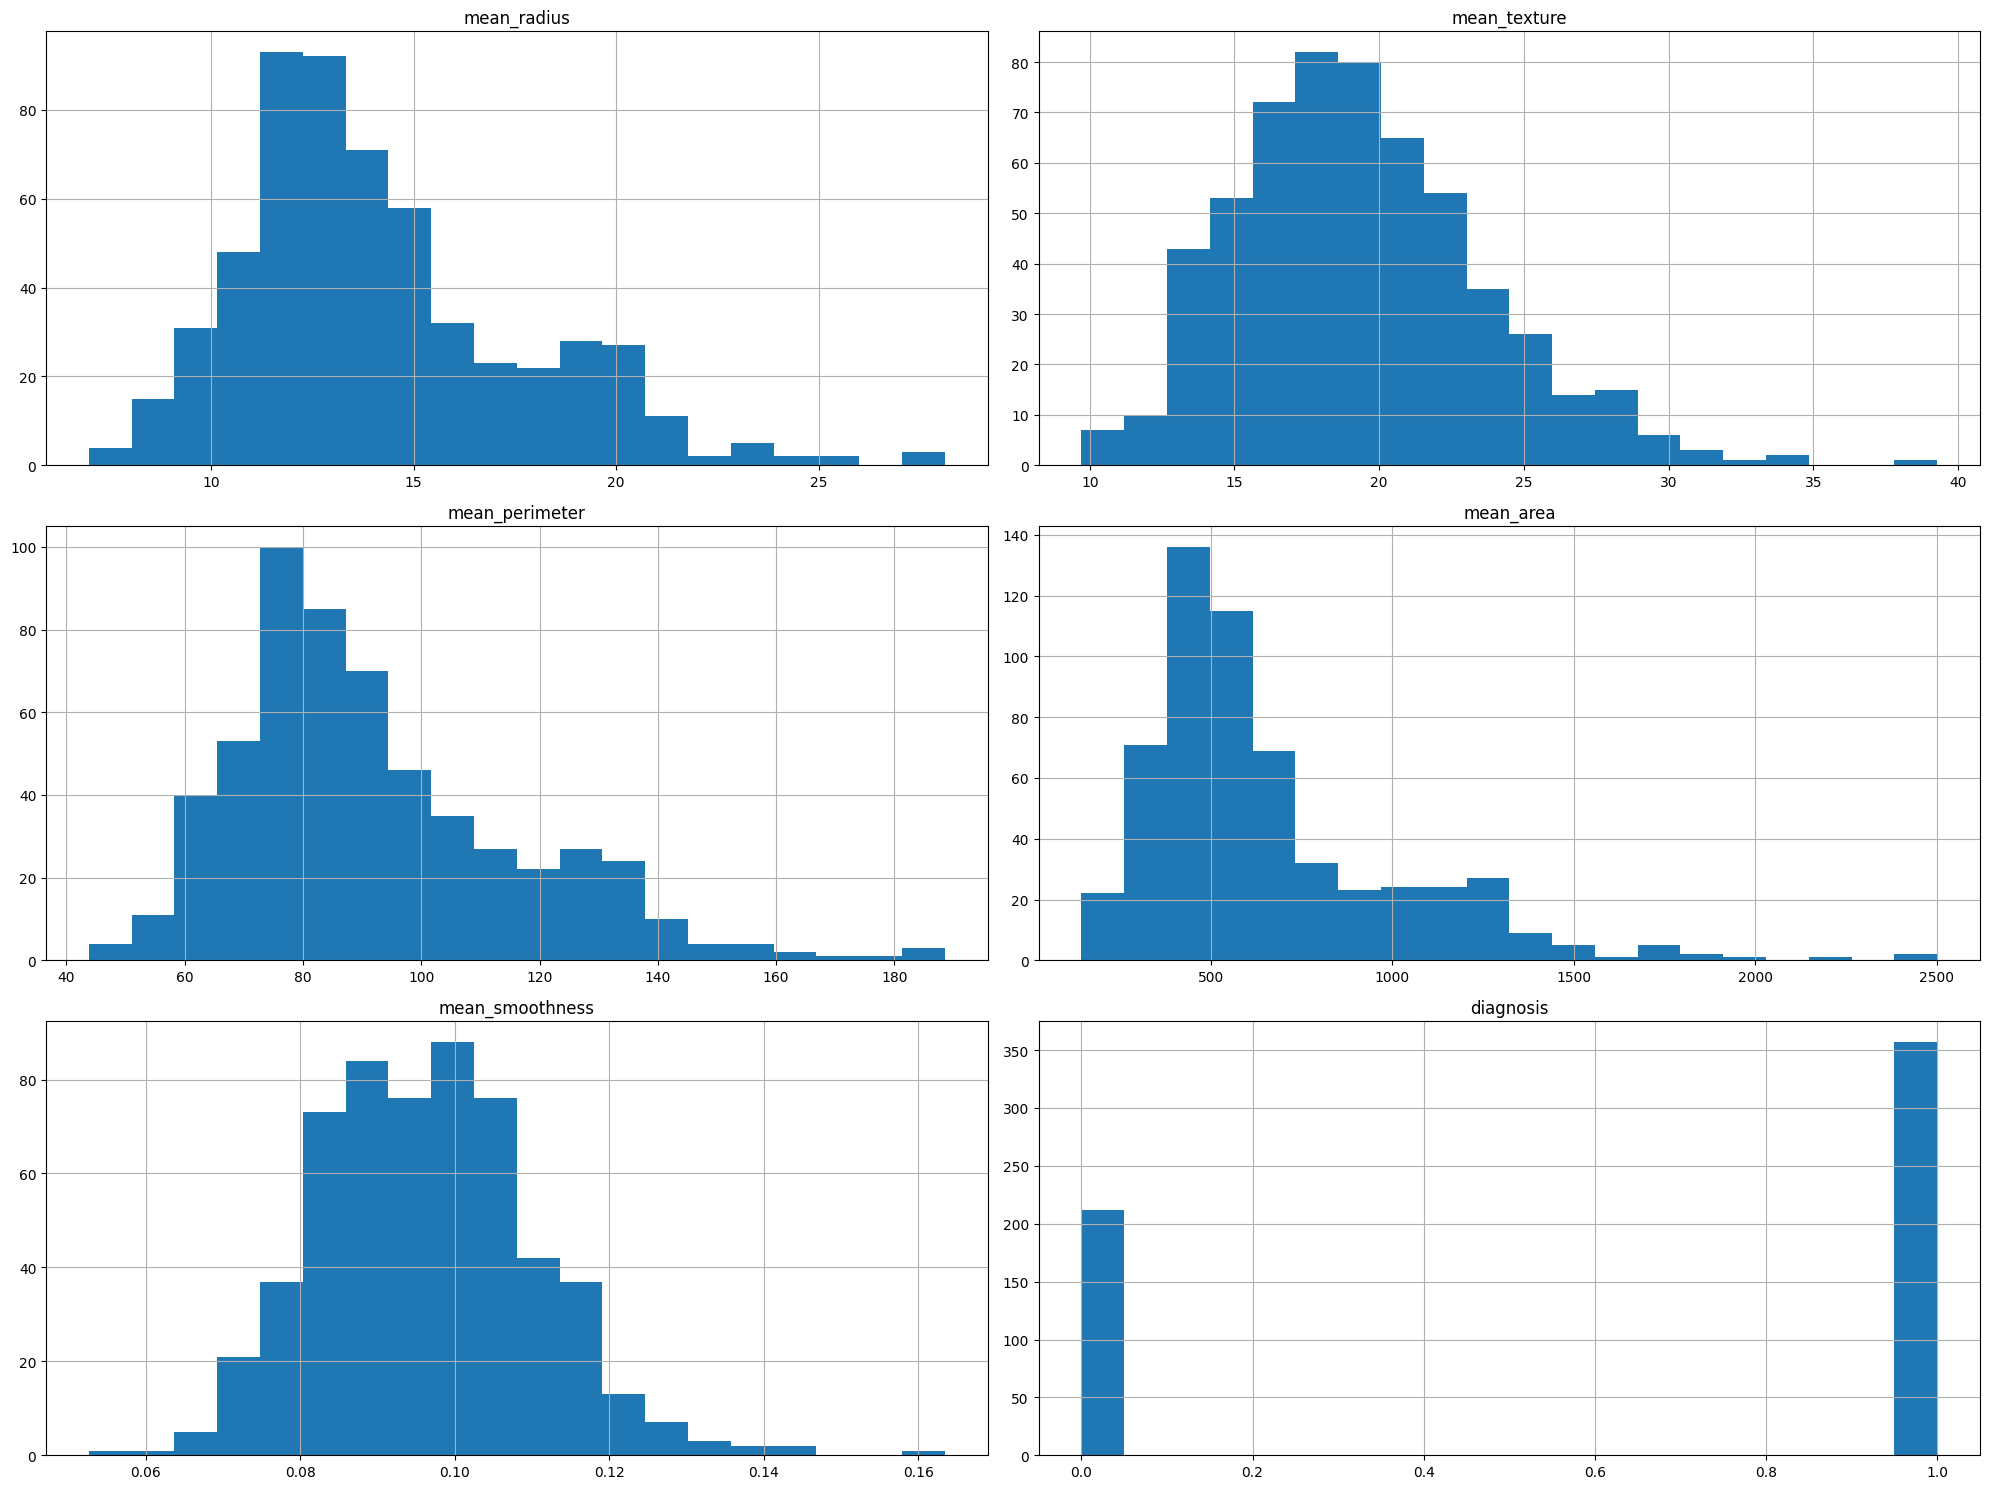

In [ ]:
#Histogram Plots for each variable
df.hist(bins=20,figsize=(20,15),layout=(3,2))
plt.tight_layout()
plt.show()

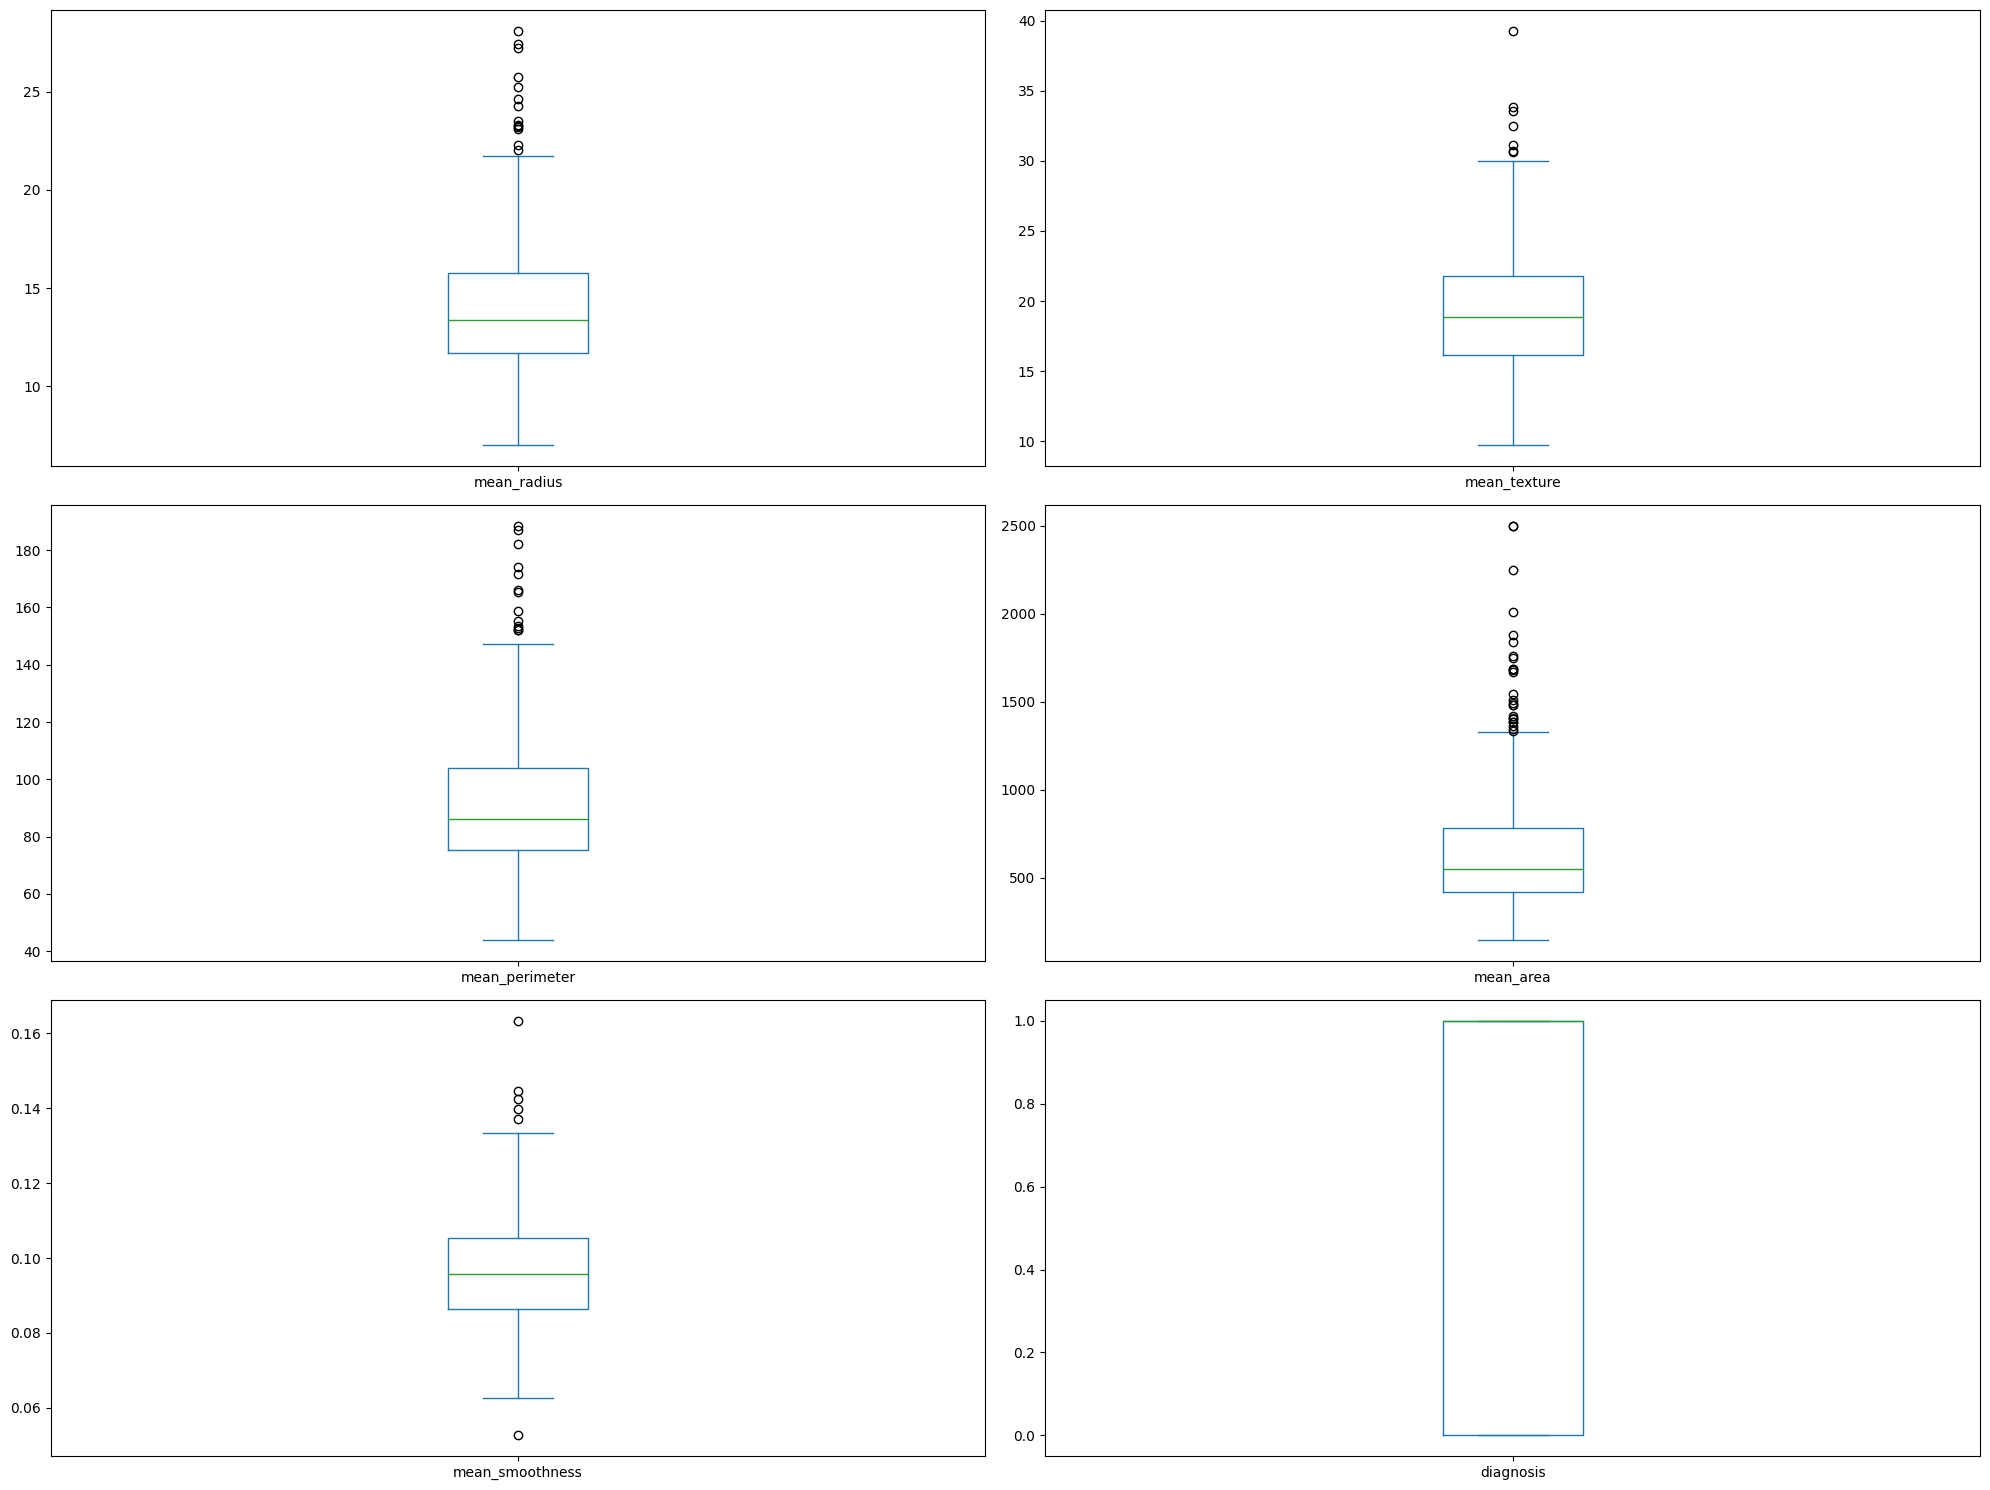

In [ ]:
#Plot the Box plot for check the outliers in Data
df.plot(kind='box',figsize=(20,15),subplots=True,layout=(3,2))
plt.tight_layout()

plt.show()

In [ ]:
# Correlation between variables
data=df.corr()
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


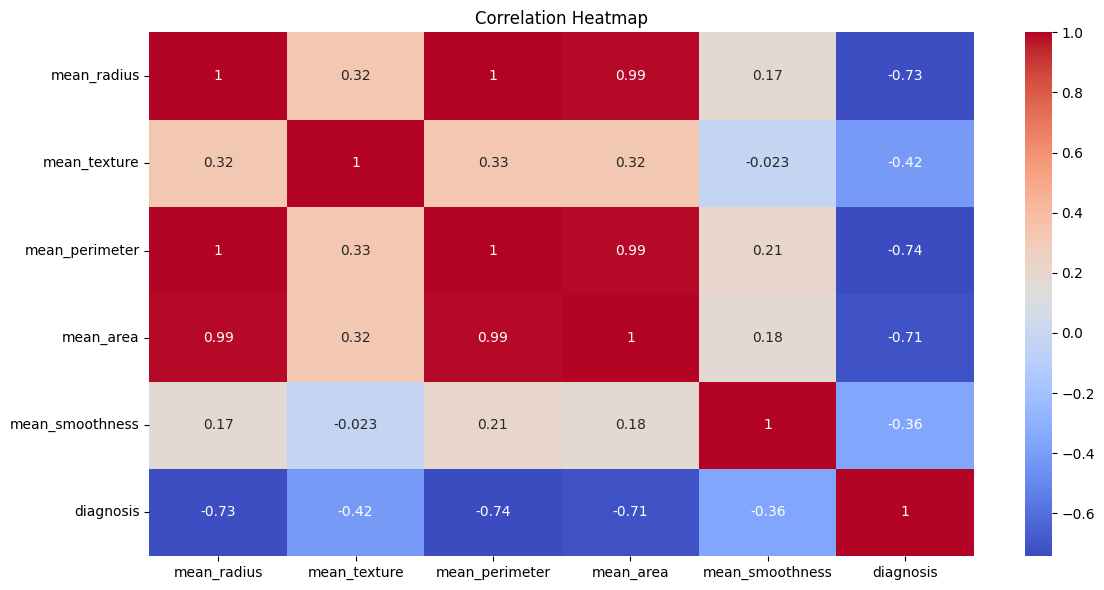

In [ ]:
#Heatmap to show correlation for better visualization
# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

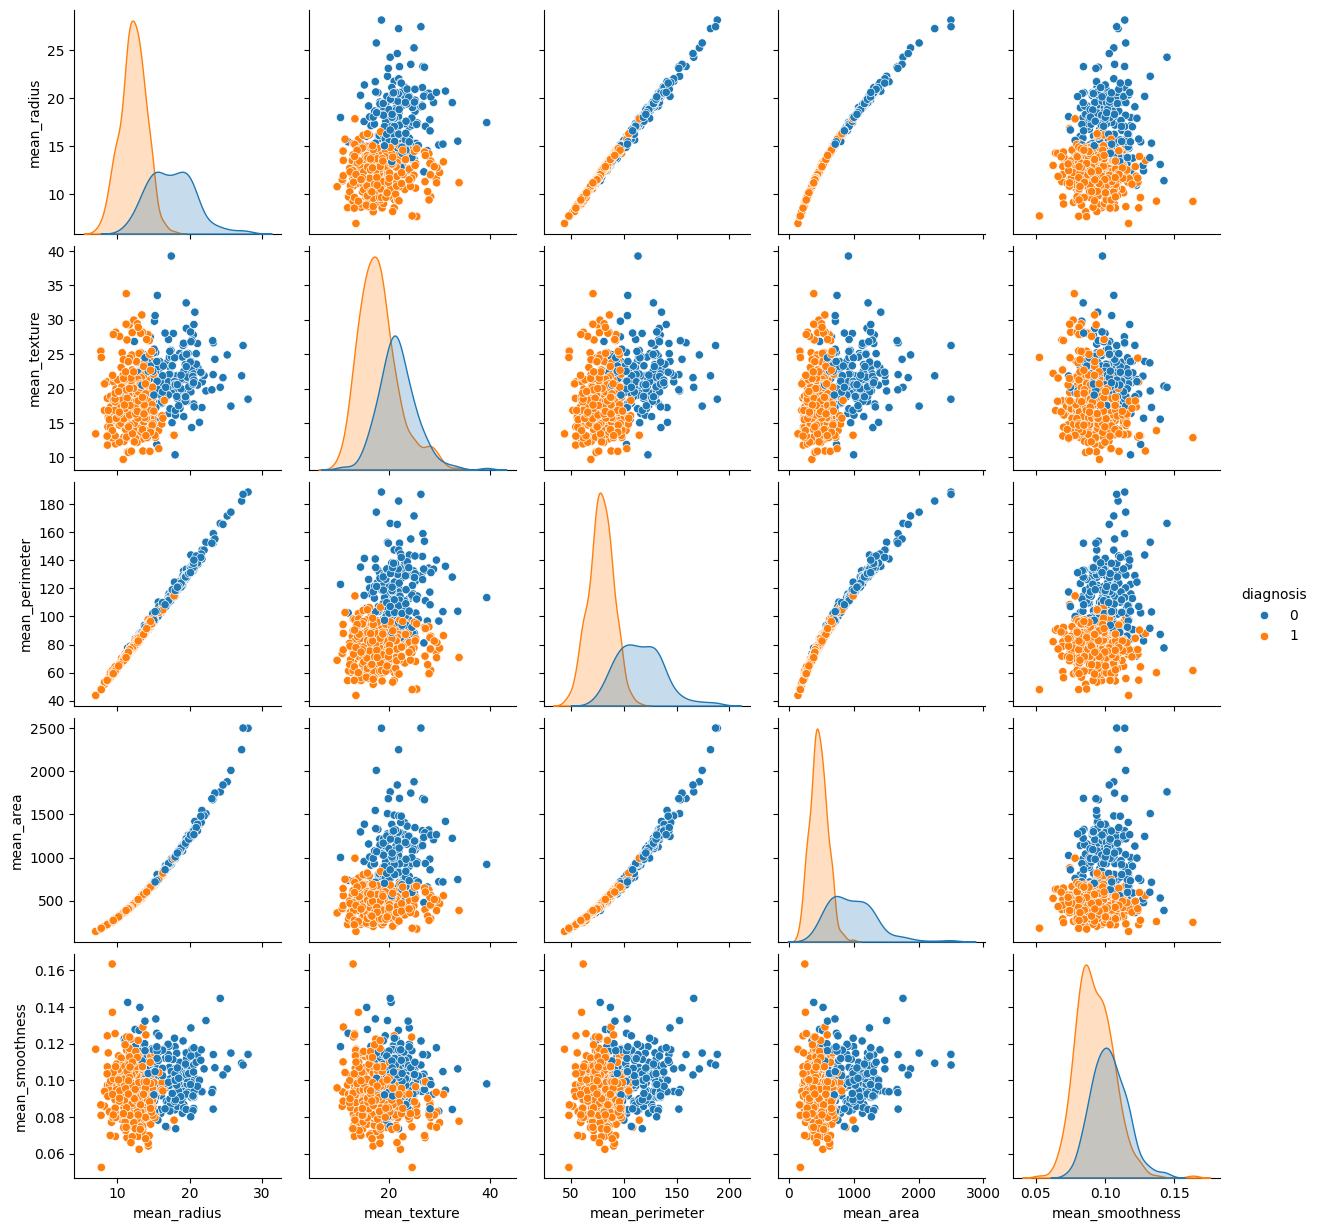

In [ ]:
#Pairplot
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df,hue='diagnosis')
plt.show()

In [ ]:
# Import ML library scikit to make classification models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Setting Dependent and Independent Variables
x = df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']]
y = df['diagnosis']

In [ ]:
#Sample of independent variable columns
x.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
355,12.56,19.07,81.92,485.8,0.08760
304,11.46,18.16,73.59,403.1,0.08853
102,12.18,20.52,77.22,458.7,0.08013
508,16.30,15.70,104.70,819.8,0.09427
518,12.88,18.22,84.45,493.1,0.12180


In [ ]:
#Sample of Dependent variable column 'diagnosis'
y.sample(5)

,diagnosis
97,1
178,1
210,0
53,0
277,0


In [ ]:
#splitting the data For Training and Testing Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# shape of Training and Testing data
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((455, 5), (455,), (114, 5), (114,))

StandardScaler standardizes features by removing the mean and scaling to unit variance. This means that the transformed feature will have a mean of 0 and a standard deviation of 1.

The formula for standardization is:

𝑧
( 𝑥 − 𝜇 )/ 𝜎

where:

𝑥 x is the original feature value.

𝜇 μ is the mean of the feature.

𝜎 σ is the standard deviation of the feature.

In [ ]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression Model

In [ ]:
Model = LogisticRegression()
Model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = Model.predict(x_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred)*100,'%')

Accuracy: 93.85964912280701 %


# Logistic Regression after Hypertuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'breast_cancer_data2.csv'  # Replace with your file path if different
data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],    # Regularization strength
    'penalty': ['l1', 'l2'],          # Regularization type
    'solver': ['liblinear']           # Solver (liblinear supports l1 and l2)
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 94.74%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



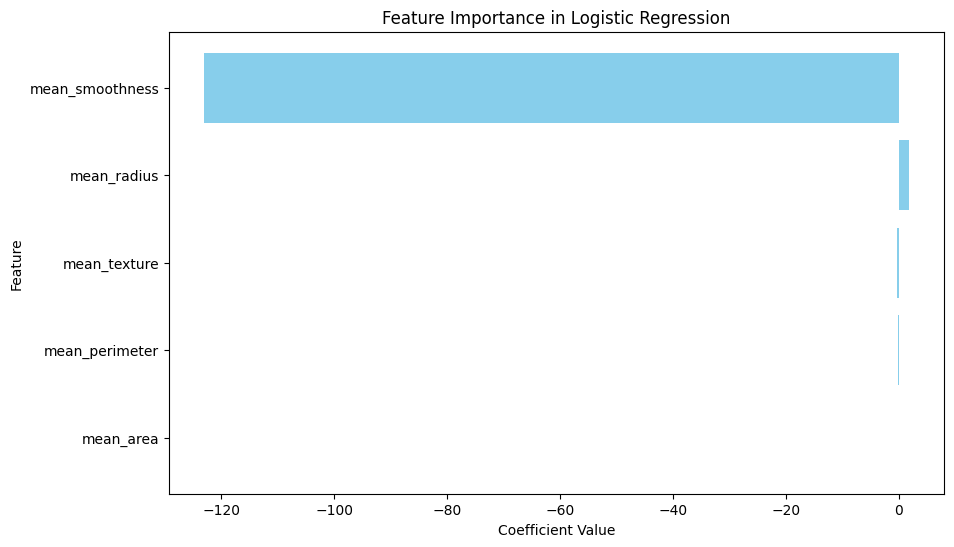

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'best_model' is the Logistic Regression model with the best parameters from the GridSearchCV
# and X_train contains the feature names

# Retrieve the coefficients from the model
coefficients = best_model.coef_[0]  # For binary classification, it's a 1D array

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature on top
plt.show()


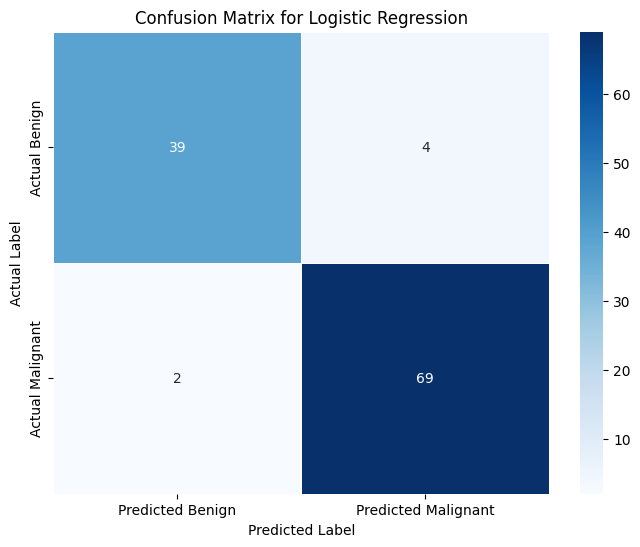

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming y_test and y_pred have been defined from the previous steps

# Compute the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df_lr = pd.DataFrame(cm_lr, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_lr, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


# Naive Bayes Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Gaussian Naive Bayes model
model = GaussianNB()


In [ ]:
# Convert y_train to integers if it's categorical
y_train = y_train.astype(int)

# Train the model
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
import numpy as np

# Check unique values and their counts in y_test
unique_test, counts_test = np.unique(y_test, return_counts=True)
print("Unique values in y_test:", unique_test)
print("Counts in y_test:", counts_test)

# Check unique values and their counts in y_train
unique_train, counts_train = np.unique(y_train, return_counts=True)
print("\nUnique values in y_train:", unique_train)
print("Counts in y_train:", counts_train)

Unique values in y_test: [0 1]
Counts in y_test: [43 71]

Unique values in y_train: [0 1]
Counts in y_train: [169 286]


# Naive Bayes Classification

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.preprocessing import Binarizer

# Check data types of y_test and y_pred
print("Data type of y_test:", y_test.dtype)
print("Data type of y_pred:", y_pred.dtype)

# If y_test is continuous, convert it to discrete values using a threshold
# Assuming 'y_test' is continuous and needs to be binarized
if np.issubdtype(y_test.dtype, np.floating):
    # Define your threshold (e.g., 0.5 for binary classification)
    threshold = 0.5
    binarizer = Binarizer(threshold=threshold)

    # Convert y_test to binary discrete values
    y_test_binarized = binarizer.fit_transform(y_test.values.reshape(-1, 1)).flatten()
    print("y_test after binarization:", y_test_binarized[:10])  # Display the first 10 values to verify

    # Ensure y_pred is also in the same format (binarization if necessary)
    y_pred_binarized = binarizer.transform(y_pred.reshape(-1, 1)).flatten()
    print("y_pred after binarization:", y_pred_binarized[:10])  # Display the first 10 values to verify
else:
    y_test_binarized = y_test
    y_pred_binarized = y_pred

# Now, generate the classification report with the binarized labels
print('Classification Report:')
report = classification_report(y_test_binarized, y_pred_binarized)
print(report)


Data type of y_test: int64
Data type of y_pred: int64
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.91      1.00      0.95        71

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



# Revised Naive Bayes after Hypertuning parameters

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'breast_cancer_data2.csv'  # Replace with your file path if different
data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'var_smoothing': 1e-09}
Accuracy: 93.86%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.91      1.00      0.95        71

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



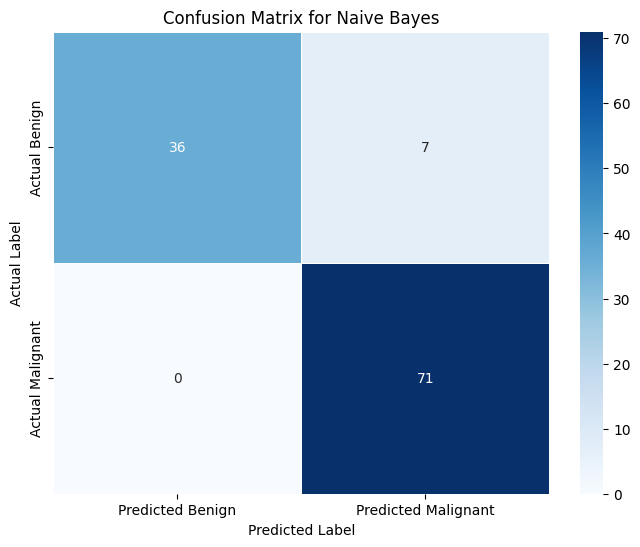

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is already loaded into a DataFrame 'data'

# Split the data into features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Now you can use the code to plot the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df_nb = pd.DataFrame(cm_nb, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_nb, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


# K Nearest Neighbours

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'breast_cancer_data2.csv'  # Replace with your file path if different
data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 93.86%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



# KNN after hypertuning parameters

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'breast_cancer_data2.csv'  # Replace with your file path if different
data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 92.11%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.92      0.96      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



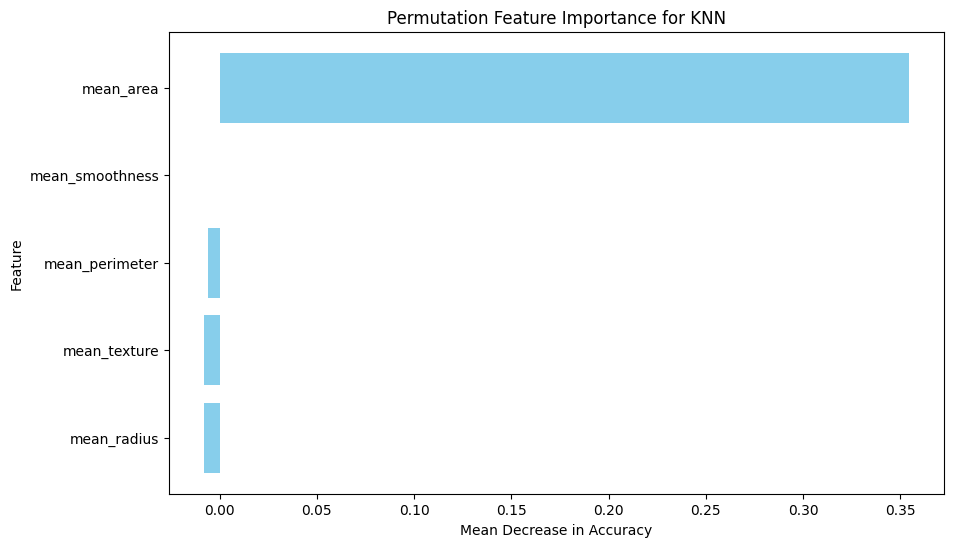

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming best_knn is the trained KNN model and X_test, y_test are defined

# Calculate permutation feature importance
result = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')

# Get feature importance scores
importance = result.importances_mean

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Mean Decrease in Accuracy')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for KNN')
plt.gca().invert_yaxis()
plt.show()


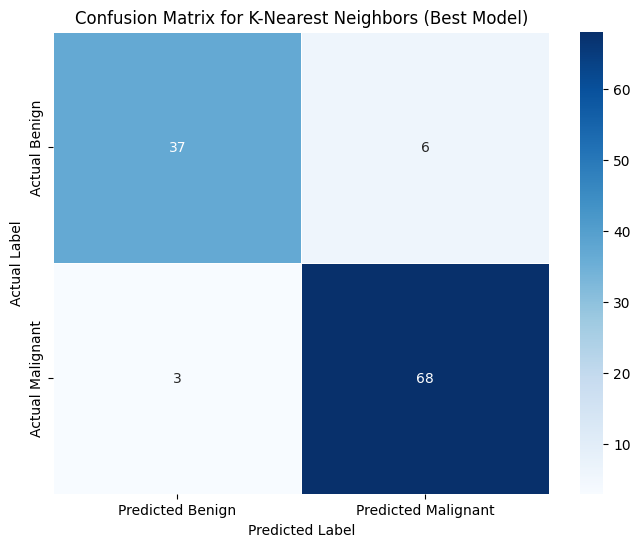

In [ ]:
# Compute and plot the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred)
cm_df_knn = pd.DataFrame(cm_knn, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_knn, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for K-Nearest Neighbors (Best Model)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'breast_cancer_data2.csv'  # Replace with your file path if different
data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 94.74%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



# Hypertuning Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'breast_cancer_data2.csv'  # Replace with your file path if different
data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 94.74%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



**Feature Importance for Random Forest**

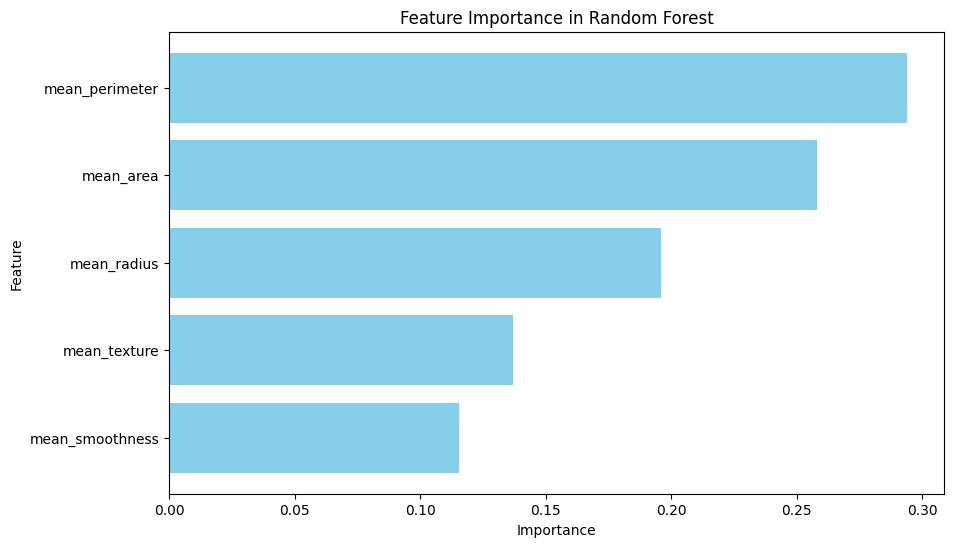

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming best_rf is the trained RandomForestClassifier model

# Get the feature importances
feature_importances = best_rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature on top
plt.show()


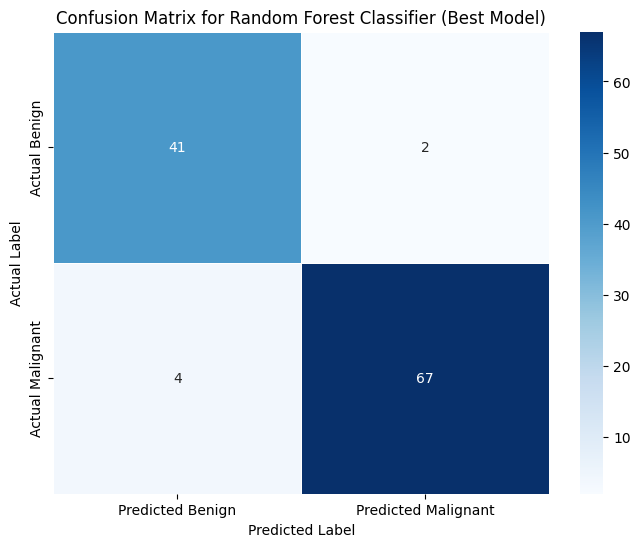

In [ ]:
# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df_rf = pd.DataFrame(cm_rf, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_rf, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for Random Forest Classifier (Best Model)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'breast_cancer_data2.csv'  # Replace with your file path if different
data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 90.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        43
           1       0.95      0.89      0.92        71

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



# Decision Tree after Hypertuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'breast_cancer_data2.csv'  # Replace with your file path if different
data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],         # Function to measure the quality of a split
    'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider when looking for the best split
    'splitter': ['best', 'random']            # The strategy used to choose the split at each node
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model
best_dt = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 90.35%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.93      0.92      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



# Feature Importance in Decision Tree Classifier

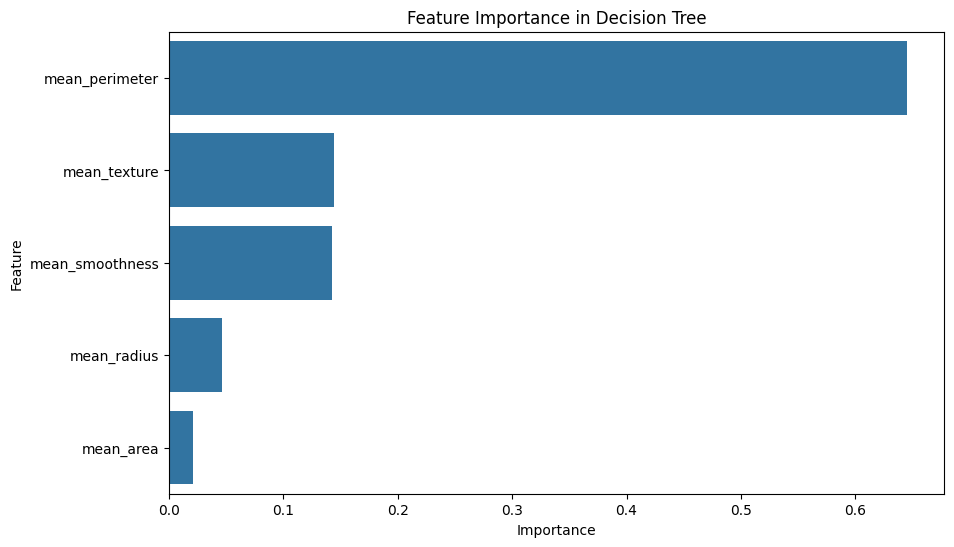

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Assuming you have trained a Decision Tree model named 'dt_model'
# Example:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance in Decision Tree')
plt.show()


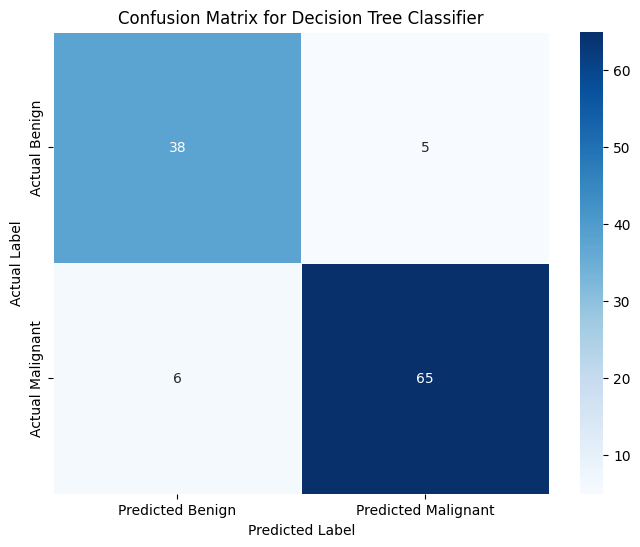

In [ ]:
# Compute the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df_dt = pd.DataFrame(cm_dt, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_dt, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Gradient Boosting Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'breast_cancer_data2.csv'  # Replace with your file path if different
data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 94.74%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Hypertuning Gradient Boosting Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'breast_cancer_data2.csv'  # Replace with your file path if different
data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define a smaller parameter grid for faster hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],         # Reduced number of boosting stages
    'learning_rate': [0.05, 0.1],       # Two options for learning rate
    'max_depth': [3, 4],                # Maximum depth of individual trees
    'min_samples_split': [2, 5],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],         # Minimum number of samples required to be at a leaf node
}

# Setup GridSearchCV with a smaller grid
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model
best_gb = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_gb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 94.74%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



# Feature Importance for Gradient Boosting Classifier

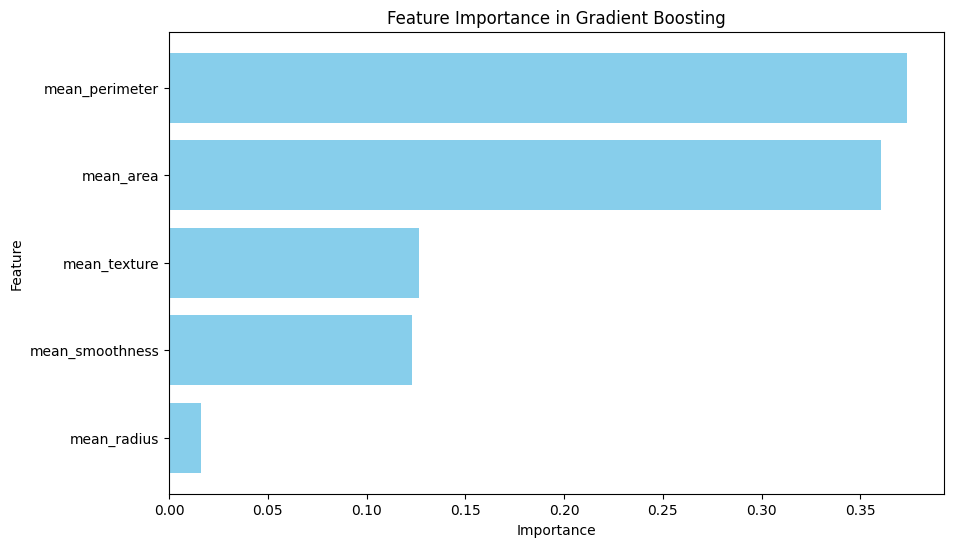

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming best_gb is the trained GradientBoostingClassifier model

# Get the feature importances
feature_importances = best_gb.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature on top
plt.show()


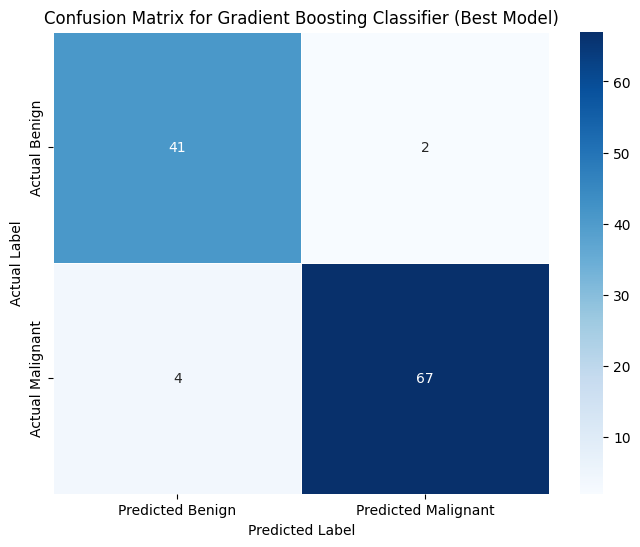

In [ ]:
# Compute and plot the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred)
cm_df_gb = pd.DataFrame(cm_gb, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_gb, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for Gradient Boosting Classifier (Best Model)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
file_path = 'breast_cancer_data2.csv'  # Replace with your file path if different
data = pd.read_csv(file_path)

# Split the data into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Dictionary to store performance metrics
performance = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score = cv_scores.mean()

    # Store the results
    performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Mean CV Score': mean_cv_score
    }

# Convert the performance dictionary to a DataFrame for better visualization
performance_df = pd.DataFrame(performance).T

# Identify the best-performing model
best_model = performance_df.idxmax()

# Print the performance of each model
print("Performance Comparison of Models:\n")
print(performance_df)

# Print the best model by each metric
print("\nBest Model by Accuracy:", best_model['Accuracy'])
print("Best Model by Precision:", best_model['Precision'])
print("Best Model by Recall:", best_model['Recall'])
print("Best Model by F1 Score:", best_model['F1 Score'])
print("Best Model by Mean CV Score:", best_model['Mean CV Score'])


Performance Comparison of Models:

                     Accuracy  Precision    Recall  F1 Score  Mean CV Score
KNN                  0.938596   0.940905  0.938596  0.937746       0.876923
Logistic Regression  0.938596   0.938457  0.938596  0.938450       0.894505
Random Forest        0.947368   0.948419  0.947368  0.947591       0.916484
Gradient Boosting    0.947368   0.947368  0.947368  0.947368       0.914286
Naive Bayes          0.938596   0.944107  0.938596  0.937318       0.896703
Decision Tree        0.903509   0.908825  0.903509  0.904399       0.865934

Best Model by Accuracy: Random Forest
Best Model by Precision: Random Forest
Best Model by Recall: Random Forest
Best Model by F1 Score: Random Forest
Best Model by Mean CV Score: Random Forest


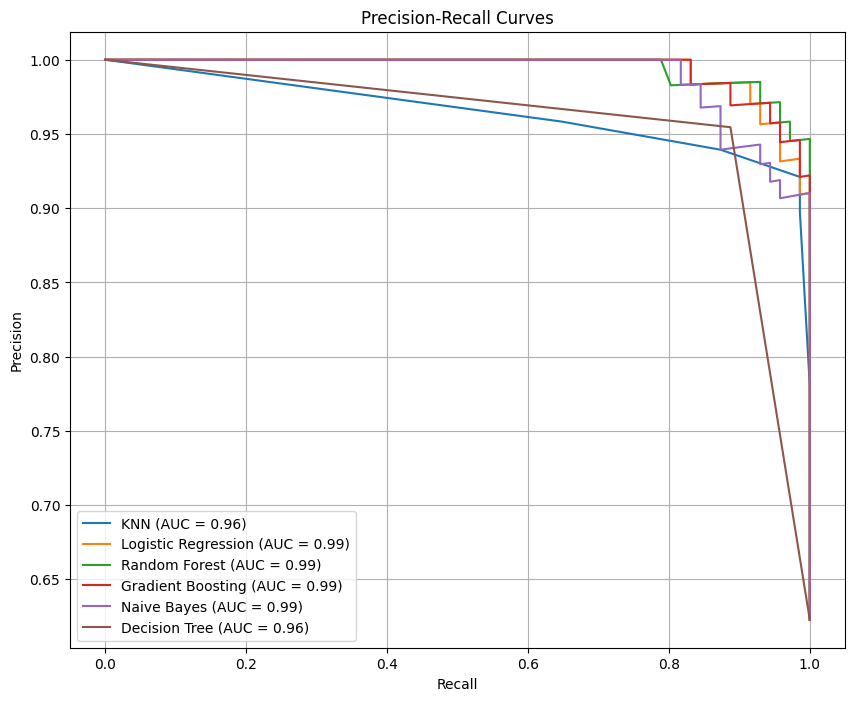

In [ ]:
# Precision recall curve for the models - KNN, Naive Bayes, Logistic Regression, Gradient Boosting, Decision Tree and Random Forest

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# ... (Your existing code for model training and evaluation)

# Dictionary to store precision-recall curves and AUC scores
pr_curves = {}

# Calculate precision-recall curves for each model
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    else:
        y_scores = model.decision_function(X_test)  # Decision function for models like SVM

    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    pr_curves[model_name] = {
        'precision': precision,
        'recall': recall,
        'auc': pr_auc
    }

# Plot the precision-recall curves
plt.figure(figsize=(10, 8))
for model_name, curve in pr_curves.items():
    plt.plot(curve['recall'], curve['precision'], label=f'{model_name} (AUC = {curve["auc"]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


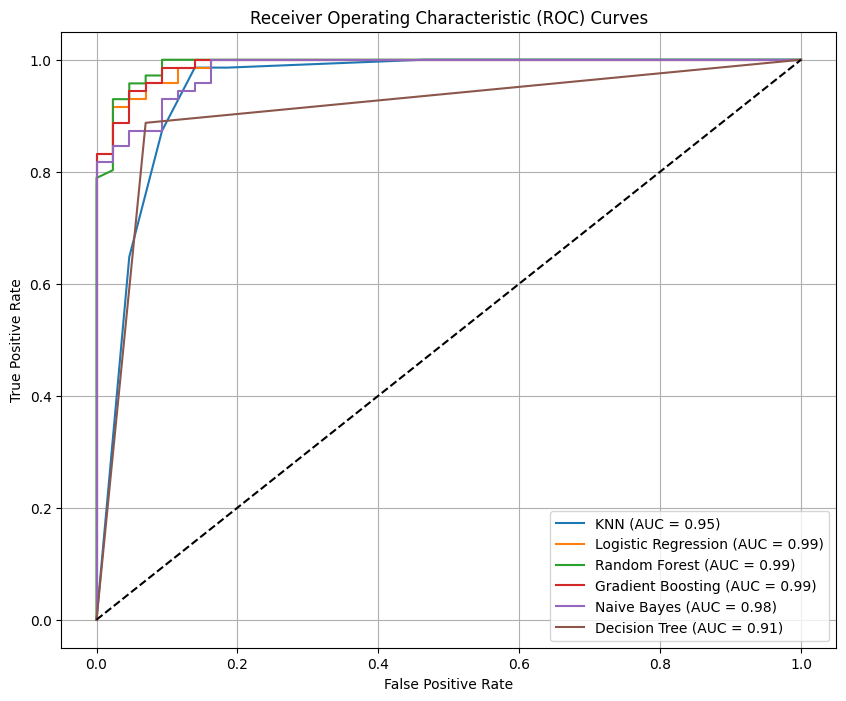

In [ ]:
# AUC curve for the models - KNN, Naive Bayes, Logistic Regression, Gradient Boosting, Decision Tree and Random Forest

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dictionary to store ROC curves and AUC scores
roc_curves = {}

# Calculate ROC curves for each model
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    else:
        y_scores = model.decision_function(X_test)  # Decision function for models like SVM

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    roc_curves[model_name] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for model_name, curve in roc_curves.items():
    plt.plot(curve['fpr'], curve['tpr'], label=f'{model_name} (AUC = {curve["auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
